## Import required Liberaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipywidgets import interact
import time 

## Loading Data

In [1]:
!unzip -o -j '/home/kanishk/Downloads/NN_MNIST.zip'

Archive:  /home/kanishk/Downloads/NN_MNIST.zip
  inflating: Nearest_neighbor_MNIST.ipynb  
  inflating: Nearest_neighbor_MNIST-checkpoint.ipynb  
  inflating: test_labels.npy         
  inflating: train_labels.npy        
  inflating: test_data.npy           
  inflating: train_data.npy          


In [2]:
train_set=np.load('/home/kanishk/train_data.npy')
test_set=np.load('/home/kanishk/test_data.npy')
train_labels=np.load('/home/kanishk/train_labels.npy')
test_labels=np.load('/home/kanishk/test_labels.npy')

In [3]:
values, counts=np.unique(train_labels,return_counts=True)
dict(zip(values,counts))

{0: 750,
 1: 750,
 2: 750,
 3: 750,
 4: 750,
 5: 750,
 6: 750,
 7: 750,
 8: 750,
 9: 750}

## Visualizing Data

In [4]:
def image(index,data):
    if data=="train":
        plt.imshow(train_set[index].reshape((28,28)),plt.cm.binary)
        plt.title('Label: '+str(train_labels[index]))

    else:
        plt.imshow(test_set[index].reshape((28,28)),plt.cm.binary)
        plt.title('Label: '+str(test_labels[index]))    

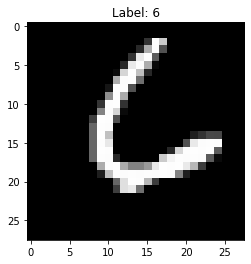

In [5]:
image(5,'test')

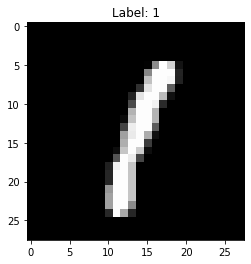

In [6]:
image(5,'train')


## Implementing Nearest Neighbors Approach 

In [7]:
class NN_classifier:
    test_case=[]
    train=[]
    ylabel=0
    xlabel=0
    dist=[]
    
    def __init__(self,x,x_label,y,y_label):
        self.test_case=x
        self.train=y
        self.xlabel=x_label
        self.ylabel=y_label
        self.dist=[np.sqrt(np.sum((self.test_case-value)**2)) for value in self.train]
    
    def label(self):
        return self.ylabel[np.argmin(self.dist)]
    
    def show_pred(self):
        plt.imshow(self.train[np.argmin(self.dist)].reshape((28,28)),plt.cm.gray)
        plt.title('Label: '+str(self.ylabel[np.argmin(self.dist)]))
        plt.show()
    
    def show_act(self):
        plt.imshow(self.test_case.reshape((28,28)),plt.cm.gray)
        plt.title('Label: '+str(self.xlabel))
        plt.show()

In [8]:
@interact
def results(arg=range(len(test_set)),att=['label','show_pred','show_act']):
    model=NN_classifier(test_set[arg],test_labels[arg],train_set,train_labels)
    a=eval('model.{}()'.format(att))
    if a!=None:
        print(a)

interactive(children=(Dropdown(description='arg', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…

## Processing full test with Error calculation

Classification time falls in a specific range. Within a range the time taken depends upon the efficiency of the
machine i.e. the processor, here i have i3 processor.

1. Implementing Classifier using class

In [9]:
pred=[]
t_before=time.time()
for i in range(len(test_set)):
    model=NN_classifier(test_set[i],test_labels[i],train_set,train_labels)
    pred.append(model.label())
t_after=time.time()
print('Classification time: '+ str(t_after-t_before))

Classification time: 135.0784740447998


2. Implementing Classifier using simple function

In [ ]:
def NN(x):
    dist=[sum((x-train_set[i])**2) for i in range(len(train_set))]
    return train_labels[np.argmin(dist)]
t_before=time.time()
predict=[NN(value) for value in test_set]
t_after=time.time()
print('Classification time: '+str(t_after-t_before))

Error Calculation

In [14]:
error=np.not_equal(pred,test_labels).sum()/len(test_set)
print('Error: '+str(error))

Error: 0.046


## Faster Nearest Neighbor methods

### Ball Tree Approach

In [19]:
from sklearn.neighbors import BallTree
t_before=time.time()
model1=BallTree(train_set)
t_after=time.time()
print('Training time: '+str(t_after-t_before))

Training time: 2.4600791931152344


In [48]:
t_before=time.time()
indices=model1.query(test_set,return_distance=False)
indices=np.squeeze(indices)
predictions=train_labels[indices]
t_after=time.time()
print('Classification_time: '+str(t_after-t_before))

Classification_time: 11.339403629302979


In [50]:
error=np.not_equal(predictions,test_labels).sum()/len(test_set)
print('Error: '+str(error))

Error: 0.046


### KD-Tree Approach

In [55]:
from sklearn.neighbors import KDTree
t_before=time.time()
model2=KDTree(train_set)
t_after=time.time()
print('Training time: '+str(t_after-t_before))

Training time: 2.414646863937378


In [57]:
time_before=time.time()
indices=model2.query(test_set,return_distance=False)
indices=np.squeeze(indices)
predictions=train_labels[indices]
time_after=time.time()
print('Classification time: '+str(t_after-t_before))

Classification time: 2.414646863937378


In [58]:
error=np.not_equal(predictions,test_labels).sum()/len(test_set)
print('Error: '+str(error))

Error: 0.046
